<a href="https://colab.research.google.com/github/Mamadou2025/Pseudo-Dual-Rickart-Code-Tester/blob/main/Fontions_Images_Regularity_Gcd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from itertools import product

def gcd(x, y):
    """Calculates the GCD of x and y, with gcd(0,0) = 0"""
    while y != 0:
        x, y = y, x % y
    return abs(x) if x != 0 else 0

def is_endomorphism(f, M):
    """Checks if f preserves the GCD operation"""
    return all(f[gcd(x, y)] == gcd(f[x], f[y]) for x, y in product(M, repeat=2))

def is_idempotent(f, M):
    """Checks if f ∘ f = f"""
    return all(f[f[x]] == f[x] for x in M)

def direct_image(f, M):
    """Calculates the direct image of f"""
    return {f[x] for x in M}

def extended_image(f, M):
    """Calculates the extended image closed under GCD"""
    im_f = direct_image(f, M)
    return {y for y in M if any(gcd(y, f[x]) in im_f for x in M)}

def generate_valid_functions(M):
    """Generates all valid endomorphisms"""
    functions = []
    for f_vals in product(M, repeat=len(M)):
        f = dict(enumerate(f_vals))
        if f[0] == 0 and is_endomorphism(f, M):
            functions.append(f)
    return functions

def analyze_functions(M):
    """Displays a complete analysis with 'i-regular'"""
    print("\nFunction".ljust(15), "Idempotent".ljust(12), "Image".ljust(15), "Extended Image".ljust(18), "i-regular")
    print("-" * 65)

    for f in generate_valid_functions(M):
        f_tuple = tuple(f[i] for i in sorted(M))
        im = direct_image(f, M)
        im_ext = extended_image(f, M)

        row = f"{str(f_tuple).ljust(15)} | "
        row += f"{'Yes' if is_idempotent(f, M) else 'No'.ljust(10)} | "
        row += f"{str(im).ljust(13)} | "
        row += f"{str(im_ext).ljust(16)} | "

        # Determine i-regularity
        if im == im_ext:
            row += "Yes"
        else:
            row += "No"

        print(row)

# Define n directly here (no input())
n = 2  # Change this value as needed
M = list(range(n + 1))
analyze_functions(M)


Function       Idempotent   Image           Extended Image     i-regular
-----------------------------------------------------------------
(0, 0, 0)       | Yes | {0}           | {0}              | Yes
(0, 1, 0)       | Yes | {0, 1}        | {0, 1, 2}        | No
(0, 1, 1)       | Yes | {0, 1}        | {0, 1, 2}        | No
(0, 1, 2)       | Yes | {0, 1, 2}     | {0, 1, 2}        | Yes
(0, 2, 0)       | No         | {0, 2}        | {0, 2}           | Yes
(0, 2, 2)       | Yes | {0, 2}        | {0, 2}           | Yes




HOW TO USE THIS CODE

Here's how you could proceed with this code. You can change the value of the integer n and then click the Run button. This button is located at the beginning of the code, in the top left corner, in the form of a white triangle in a black circle. For n=2, here's the captured output:

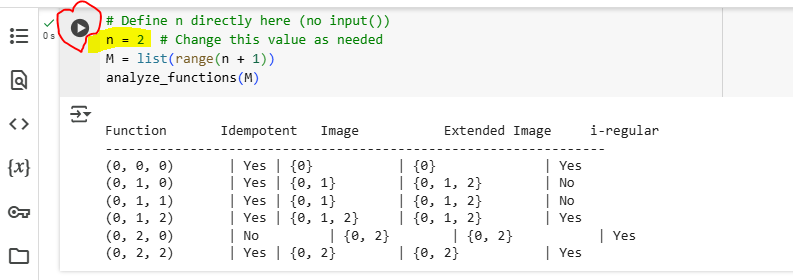

This code analyzes functions on the set M = {0, 1, ..., n} (where n=2 in the example) that preserve the GCD operation (called endomorphisms). Here's a breakdown:

Key Components:
GCD Calculation: The gcd(x, y) function computes the greatest common divisor, with gcd(0,0) = 0.

Endomorphism Check: is_endomorphism(f, M) verifies if a function f preserves GCD, i.e., f(gcd(x, y)) = gcd(f(x), f(y)) for all x, y ∈ M.

Idempotency Check: is_idempotent(f, M) checks if f ∘ f = f (i.e., applying f twice is the same as applying it once).

Image Calculation:

direct_image(f, M) gives the set of values f takes ({f(x) | x ∈ M}).

extended_image(f, M) extends the image by including all elements y ∈ M such that gcd(y, f(x)) is in the direct image for some x.

i-regularity: A function is i-regular if its direct image equals its extended image (closed under GCD).

Algorithm:
Generate Valid Functions: For M = {0, 1, ..., n}, generate all possible functions f: M → M where:

f(0) = 0 (a common requirement for GCD-preserving functions).

f is an endomorphism (preserves GCD).

Analyze Functions: For each valid function, compute:

Whether it is idempotent (f ∘ f = f).

Its direct and extended images.

Whether it is i-regular (direct image = extended image).

Output Results: Display the results in a formatted table.

Example Output (for n=2):
The code prints a table with columns:

Function: The function represented as a tuple (f(0), f(1), f(2)).

Idempotent: Whether f is idempotent.

Image: Direct image of f.

Extended Image: Extended image under GCD.

i-regular: Whether the function is i-regular.

Key Observations:
The code exhaustively checks all possible functions (brute-force) for small n.

For larger n, this approach becomes computationally expensive (since there are (n+1)^(n+1) possible functions).

